# Torch Tensors in 1D

In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

torch.__version__

'2.9.0'

In [4]:
# Function for plotting diagrams
def plotVec(vectors):
  ax = plt.axes()

  for vec in vectors:
    ax.arrow(0, 0, *vec['vector'], head_width=0.05, color=vec['color'], head_length=0.1)
    plt.text(*(vec['vector'] + 0.1), vec['name'])

  plt.ylim(-2, 2)
  plt.xlim(-2, 2)

## Types and Shape

In [6]:
ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("dtype: ", ints_to_tensor.dtype)
print("type: ", ints_to_tensor.type())

dtype:  torch.int64
type:  torch.LongTensor


In [7]:
type(ints_to_tensor)

torch.Tensor

In [8]:
floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("dtype: ", floats_to_tensor.dtype)
print("type: ", floats_to_tensor.type())

dtype:  torch.float32
type:  torch.FloatTensor


In [11]:
list_floats = [0.0, 1.0, 2.0, 3.0, 4.0]
floats_int_tensor = torch.tensor(list_floats, dtype=torch.int64)
print("dtype: ", floats_int_tensor.dtype)
print("type: ", floats_int_tensor.type())


dtype:  torch.int64
type:  torch.LongTensor


In [12]:
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
print("dtype: ", new_float_tensor.dtype)
print("type: ", new_float_tensor.type())

dtype:  torch.float32
type:  torch.FloatTensor


In [15]:
old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
print("type(before): ", old_int_tensor.type())
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("type(after): ", new_float_tensor.type())

type(before):  torch.LongTensor
type(after):  torch.FloatTensor


In [16]:
print("Size: ", new_float_tensor.size())
print("Dimension: ", new_float_tensor.ndimension())

Size:  torch.Size([5])
Dimension:  1


In [17]:
twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original size: ", new_float_tensor.size())
print("Size after view method: ", twoD_float_tensor.size())

Original size:  torch.Size([5])
Size after view method:  torch.Size([5, 1])


In [19]:
twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original size: ", new_float_tensor.size())
print("Size after view method: ", twoD_float_tensor.size())

Original size:  torch.Size([5])
Size after view method:  torch.Size([5, 1])


In [20]:
numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("dtype: ", new_tensor.dtype)
print("type: ", new_tensor.type())

dtype:  torch.float64
type:  torch.DoubleTensor


In [21]:
back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


In [22]:
numpy_array[:] = 0
print("The new tensor points to numpy_array: ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array:  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


In [23]:
pandas_series = pd.Series([0.1, 2, 0.3, 10.1])
new_tensor = torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


In [27]:
this_tensor = torch.tensor([0, 1, 2, 3])

print("First item:", this_tensor[0].item(), ", First item value: ", this_tensor[0])
print("Second item:", this_tensor[1].item(), ", Second item value: ", this_tensor[1])
print("Third item:", this_tensor[2].item(), ", Third item value: ", this_tensor[2])

First item: 0 , First item value:  tensor(0)
Second item: 1 , Second item value:  tensor(1)
Third item: 2 , Third item value:  tensor(2)


In [28]:
torch_to_list = this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:", torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


## Indexing and Slicing

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/idex_1.png" width="500" alt="Python Index">


In [29]:
index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("Value on idx 0:", index_tensor[0])
print("Value on idx 1:", index_tensor[1])
print("Value on idx 2:", index_tensor[2])

Value on idx 0: tensor(0)
Value on idx 1: tensor(1)
Value on idx 2: tensor(2)


In [32]:
tensor_sample = torch.tensor([20, 1, 2, 3, 4])

print("Initial value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Initial value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


In [33]:
subset_tensor_sample = tensor_sample[1:4]
print("Original:", tensor_sample)
print("Subset:", subset_tensor_sample)

Original: tensor([100,   1,   2,   3,   4])
Subset: tensor([1, 2, 3])


In [36]:
print("Initial value on index 3 and 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified:", tensor_sample)

Initial value on index 3 and 4: tensor([300, 400])
Modified: tensor([100,   1,   2, 300, 400])


In [37]:
selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("Initial:", tensor_sample)
print("Subset:", subset_tensor_sample)

Initial: tensor([100,   1,   2, 300, 400])
Subset: tensor([300, 400])


In [38]:
tensor_sample[selected_indexes] = 10000
print("Modified:", tensor_sample)

Modified: tensor([  100,     1,     2, 10000, 10000])


## Tensor Functions

In [39]:
math_tensor = torch.tensor([1.0, -1.0, 1, -1])
mean = math_tensor.mean()
print("Mean:", mean)

Mean: tensor(0.)


In [41]:
standard_deviation = math_tensor.std()
print("Standard deviation:", standard_deviation)

Standard deviation: tensor(1.1547)


In [42]:
max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
max_val = max_min_tensor.max()
min_val = max_min_tensor.min()

print("Max number:", max_val)
print("Min number:", min_val)

Max number: tensor(5)
Min number: tensor(1)


In [43]:
pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("Sin:", sin)

Sin: tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


In [45]:
print("Linspace of 5:", torch.linspace(-2, 2, steps=5))
print("Linspace of 9:", torch.linspace(-2, 2, steps=9))

Linspace of 5: tensor([-2., -1.,  0.,  1.,  2.])
Linspace of 9: tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


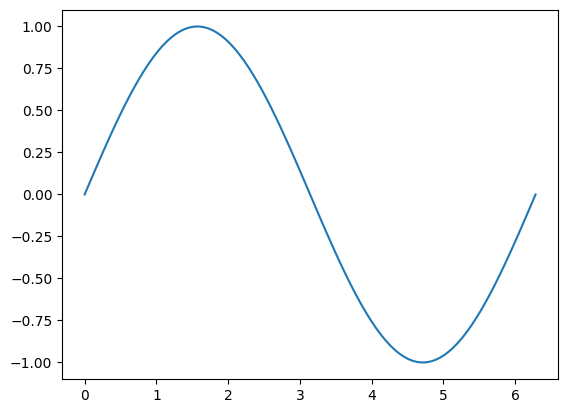

In [46]:
pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)
plt.plot(pi_tensor.numpy(), sin_result.numpy())

## Tensor Operations

In [47]:
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

w = u + v
print("Result:", w)

Result: tensor([1, 1])


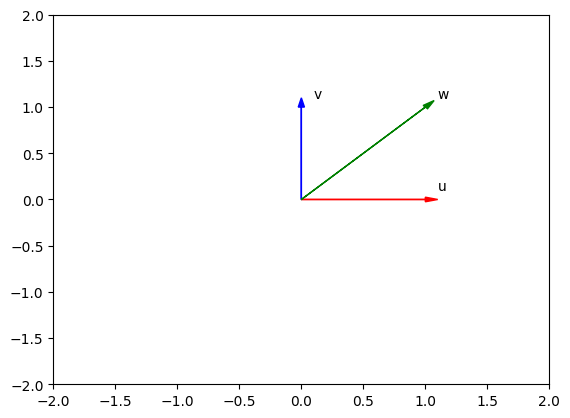

In [48]:
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

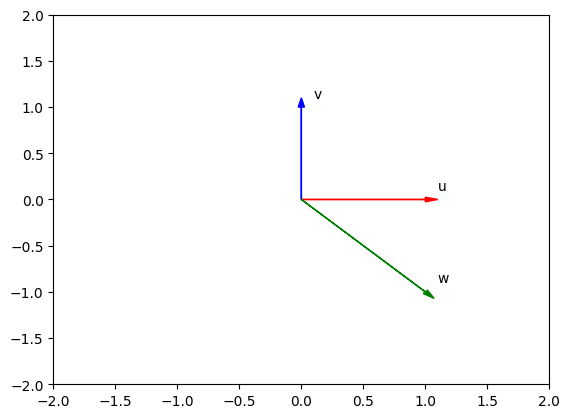

In [49]:
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])
w = u - v

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

In [50]:
u = torch.tensor([1, 2, 3, -1])
v = u + 1
print("Addition result:", v)

Addition result: tensor([2, 3, 4, 0])


In [51]:
u = torch.tensor([1, 2])
v = 2 * u
print("Multiplication:", v)

Multiplication: tensor([2, 4])


In [52]:
u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v

print ("The result of u * v", w)

The result of u * v tensor([3, 4])


In [53]:
u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)
